In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
agn_dataframe = pd.read_csv("adjusted_agn_dataframe.csv")

In [3]:
flag = [float('inf')]

# Converts a string into a float list.
# String must be in the following format:
# '[1.01, 2.02, 3.03, 4.04]'
# Returns an array of len=1 with the one index='inf' if the String
# cannont be converted into a list of floats.
# Takes an optional string char for the characters to split by
def convert_to_float_list(str_list, **kwargs):
    char = kwargs.get('char', None)
    debug = kwargs.get('debug', False)
    
    if debug:
        print(str_list + ' foo')
        
    str_list = str_list.replace('[', '')
    str_list = str_list.replace(']', '')
    
    if debug:
        print(str_list + ' bar')
    
    try:
        return [float(i) for i in str_list.split(char)]
    except ValueError:
        return flag

### SNR, LC Length, and Lbol

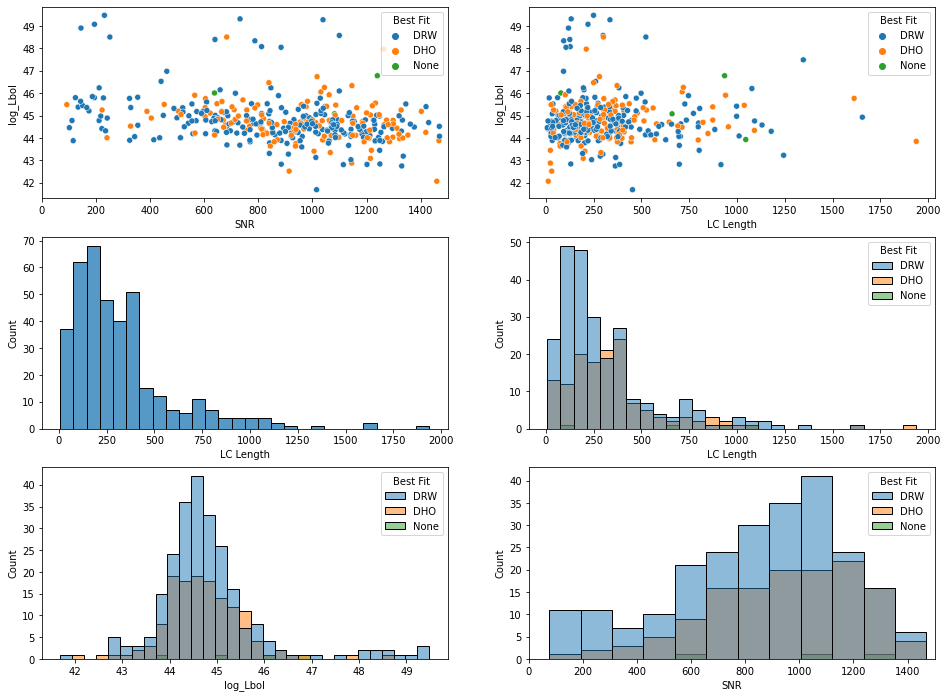

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

#######
# row 0
#######
row = 0

# SNR vs LBol
sns.scatterplot(data=agn_dataframe, x='SNR', y ='log_Lbol', hue='Best Fit', ax=axs[row,0])
axs[row, 0].set_xlim(0, 1500) 
# note: there are some outliers

# LC Length vs LBol
sns.scatterplot(data=agn_dataframe, x='LC Length', y ='log_Lbol', hue='Best Fit', ax=axs[row,1])

#######
# row 1
#######
row += 1

# histogram of LC Length
sns.histplot(data=agn_dataframe, x='LC Length', ax=axs[row,0])

# histogram of LC Length for best fit
sns.histplot(data=agn_dataframe, x='LC Length', hue='Best Fit', ax=axs[row,1])

#######
# row 2
#######
row += 1

# histogram of LBol for best fit
sns.histplot(data=agn_dataframe, x='log_Lbol', hue='Best Fit', ax=axs[row,0])

# histogram of SNR for best fit
sns.histplot(data=agn_dataframe, x='SNR', hue='Best Fit', ax=axs[row,1])
axs[row, 1].set_xlim(0, 1500) 
# note: there are some outliers

plt.savefig('plots_and_figures\plots_mcmc.png')
plt.show()

### Lbol Source

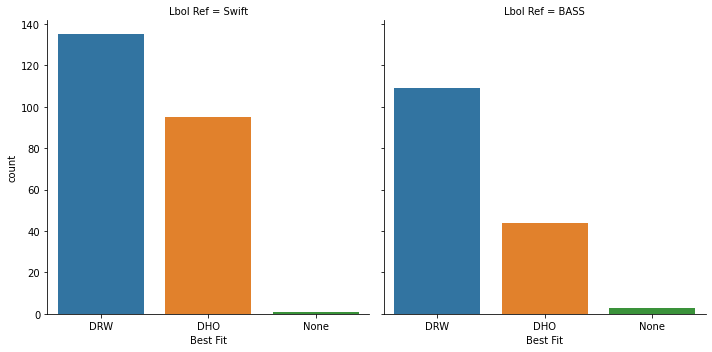

In [14]:
sns.catplot(data=agn_dataframe, x='Best Fit', col='Lbol Ref', kind='count')
plt.savefig('best_source.png')
plt.show()

### DRW Tau and Amp vs Lbol

In [4]:
best_fits = []
taus = []
amps = []
Lbols = []

for index, row in agn_dataframe.iterrows():
    best_fit= row['Best Fit']
    DRW_term = convert_to_float_list(row['Best DRW ARMA Fit'])
    Lbol = row['log_Lbol']
    
    best_fits.append(best_fit)
    taus.append(DRW_term[0])
    amps.append(DRW_term[1])
    Lbols.append(Lbol)

drw_data = pd.DataFrame({'Best Fit': best_fits, 'tau': taus, 'amp': amps, 'log_Lbol': Lbols})

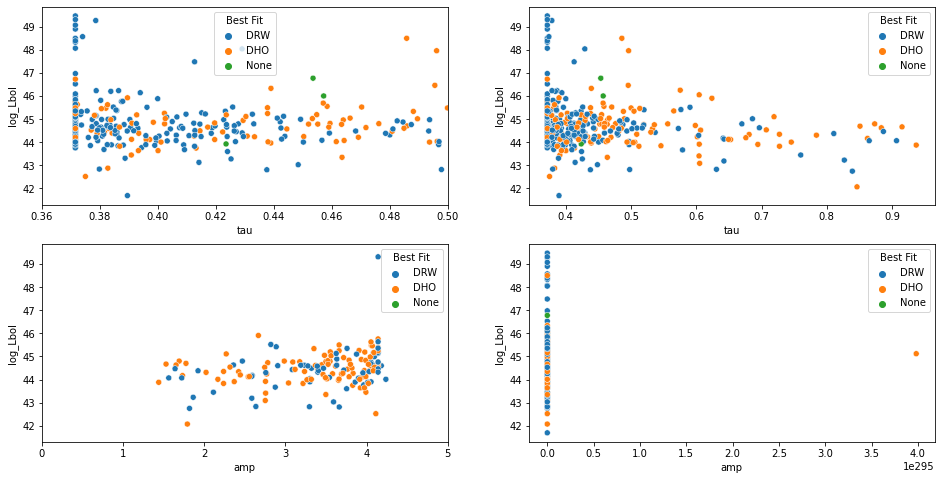

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

#######
# row 0
#######
row = 0

sns.scatterplot(data=drw_data, x='tau', y ='log_Lbol', hue='Best Fit', ax=axs[row, 0])
axs[row, 0].set_xlim(0.36, 0.50) 

sns.scatterplot(data=drw_data, x='tau', y ='log_Lbol', hue='Best Fit', ax=axs[row, 1])

#######
# row 1
#######
row = 1

sns.scatterplot(data=drw_data, x='amp', y ='log_Lbol', hue='Best Fit', ax=axs[row, 0])
axs[row, 0].set_xlim(0, 5) 

sns.scatterplot(data=drw_data, x='amp', y ='log_Lbol', hue='Best Fit', ax=axs[row, 1])

plt.savefig('drw_fit.png')
plt.show()